In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from growingspheres import counterfactuals as cf

PATH = ''## To update

# Example: Growing Spheres for 1 prediction

### 2D Illustrative

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble, tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt

X,y = datasets.make_moons(n_samples = 200, shuffle=True, noise=0.05, random_state=0)
X = (X.copy() - X.mean(axis=0))/X.std(axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = SVC(gamma=1, probability=True)
clf = clf.fit(X_train, y_train)
print(' ### Accuracy:', sum(clf.predict(X_test) == y_test)/y_test.shape[0])

def plot_classification_contour(X, clf, ax=[0,1]):
    ## Inspired by scikit-learn documentation
    h = .02  # step size in the mesh
    cm = plt.cm.RdBu
    x_min, x_max = X[:, ax[0]].min() - .5, X[:, ax[0]].max() + .5
    y_min, y_max = X[:, ax[1]].min() - .5, X[:, ax[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    #plt.sca(ax)
    plt.contourf(xx, yy, Z, alpha=.5, cmap=cm)


 ### Accuracy: 1.0


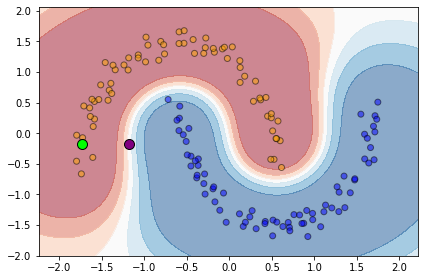

In [27]:
idx = np.random.randint(X_test.shape[0])
obs = X_test[idx, :].reshape(1, -1)

CF = cf.CounterfactualExplanation(obs, clf.predict, method='GS')
CF.fit(n_in_layer=2000, first_radius=0.1, dicrease_radius=10, sparse=False, verbose=False)
cf_x = CF.enemy.reshape(1, -1)

plot_classification_contour(X_test, clf)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', edgecolors='k', alpha=0.5, color=[['orange', 'blue'][i] for i in y_train])
plt.scatter(obs[:,0], obs[:,1], marker='o', color='lime', edgecolors='k', s=100)
plt.scatter(cf_x[:,0], cf_x[:,1], marker='o', color='purple', edgecolors='k', s=100)
plt.tight_layout()



